<div style="text-align: center;">
<h1> Zomato Dataset Analysis</h1>
</div>

## Importing the required libraries and loading the dataset

In [1]:
# import the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [77]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"..\Datasets\zomato.csv")

In [5]:
print(df)

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
56247  Four Points by Sheraton Bengaluru, 43/3, White...   
56248  Number 10, Garudachar Palya, Mahadevapura, Whi...   
56249  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56250  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56251  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe    

## Understanding the data

In [6]:
# checking all the column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [7]:
# no. of rows and columns
df.shape

(56252, 13)

In [8]:
# data types
df.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                          object
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
dtype: object

In [9]:
# top rows of the dataset
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [10]:
# botttom column
df.tail()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
56247,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
56248,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
56250,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars
56251,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500",Pubs and bars


In [11]:
# random rows
df.sample(5)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
27467,"604,4th Cross, Block 2, Kalyan Nagar, Bangalore",Venky's Xprs,No,No,3.7/5,35,+91 8861286181,Kalyan Nagar,"Quick Bites, Meat Shop",NaN,"Fast Food, Raw Meats",350,Delivery
49678,"773, HAL 2nd Stage, 100 Feet Road, Indiranagar...",Vapour Pub & Brewery,No,Yes,4.2 /5,6998,+91 9900088194\n+91 9900088197,Indiranagar,"Microbrewery, Pub","Pesto Pasta, Craft Beer, Wheat Beer, Cocktails...","North Indian, Continental, Chinese","1,400",NaN
48987,"3353, 5th Cross, 12th Main, Indiranagar, Banga...",Cafe Braqa,Yes,Yes,4.1 /5,147,+91 7204874361,Indiranagar,Cafe,"Ginger Tea, Cup Cake, Sandwich, Pasta, Pizza, ...","Cafe, Italian, Continental, Beverages",700,Delivery
47620,('Rated 4.0',"""""RATED\n A place which every bong loves to ...",daab chingri,palak chingri,railway mutton curry deserves a special appla...,none of them have disappointed me except on s...,but I don't blame them for it. Most of the Be...,('Rated 5.0',"""""RATED\n This is my favourite place in Bang...",I can't say no to this food. Went here on a s...,('Rated 5.0','RATED\n Perfect place for Bengali food. Amb...,keeping it's essence alive.\n\nÃƒÂƒ\x83ÃƒÂ‚\x...
34288,"413, 100 Feet Road, Next E-Zone, Koramangala 4...",The Terrace at Gilly's Redefined,No,Yes,4.6 /5,895,080 45128809,Koramangala 4th Block,"Microbrewery, Casual Dining","Cocktails, Beer, Mocktails, Biryani, Long Isla...","Continental, Finger Food, Asian, North Indian","1,400",NaN


### Conclusion
- There are 12 columns in the dataset
- 56252 rows in the dataset
- All the colums data types are same

## Data Cleaning

In [12]:
df.head(1)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


**Checking the duplicate values and dropping them**

In [13]:
df.duplicated().sum()

np.int64(15703)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(40549, 13)

**Standardize column names**

In [17]:
df.head(1)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


In [18]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [19]:
df.columns = [c.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for c in df.columns]

In [20]:
df = df.rename(columns={
    'approx_costfor_two_people': 'approx_cost_for_two'
})

In [21]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost_for_two', 'listed_intype'],
      dtype='object')

In [22]:
df.head(1)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two,listed_intype
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


**parse rating column -> numeric (4.1/5 -> 4.1, NEW/- -> NaN)**

In [23]:
def parse_rate(x):
    x = str(x).strip() # Convert to string & remove spaces.

    if x.upper() in {'NEW','-','--',''}:    # If the value is NEW, -, -- or empty → return NaN.
        return np.nan

    if '/' in x: # If rating looks like '4.1/5'
        try:
            return float(x.split('/')[0].strip())  # Extract '4.1' and convert to float.
        except:
            return np.nan

    try:
        return float(x) # Try converting normally (e.g. '4.3').
    except:
        return np.nan # If conversion fails → return NaN.


In [24]:
# applying on the rate column
df['rate'].apply(parse_rate)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
56247    3.6
56248    NaN
56249    NaN
56250    4.3
56251    3.4
Name: rate, Length: 40549, dtype: float64

In [25]:
# re-assigning in the column
df['rate'] = df['rate'].apply(parse_rate)

In [26]:
df.sample(2)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two,listed_intype
5399,"Ground Floor, 14, HM Geneva House, Cunningham ...",KFC,Yes,No,3.6,206,080 33994444,Cunningham Road,Quick Bites,"Burgers, Crispy Chicken, Chicken Zinger Burger...","Burger, Fast Food",400,Delivery
3767,"2nd Floor, 980, 13th Cross, 2nd Stage, Banasha...",Kydz Adda,No,No,3.4,6,+91 9686888222\r\n080 26715959,Banashankari,Casual Dining,NaN,Continental,500,Dine-out


**phone -> keep first phone, digits and leading**

In [27]:
def clean_phone(x):
    # If the value is NaN, return NaN immediately
    if pd.isna(x): 
        return np.nan
    
    # Convert to string and split at '\r\n' or '\n' to keep only the first phone number
    s = str(x).split('\\r\\n')[0].split('\n')[0]
    
    # Remove all characters except digits and '+'
    s = re.sub(r'[^0-9+]', '', s)
    
    # If the final cleaned string is empty, return NaN; otherwise return the cleaned phone
    return s if s else np.nan


In [28]:
df['phone'].apply(clean_phone)

0          08042297555
1          08041714161
2        +919663487993
3        +919620009302
4        +918026612447
             ...      
56247      08040301477
56248    +918197675843
56249              NaN
56250      08049652769
56251    +918071117272
Name: phone, Length: 40549, dtype: object

**Converting to proper data type**

In [29]:
df.head(1)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two,listed_intype
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


In [30]:
df.dtypes   

address                 object
name                    object
online_order            object
book_table              object
rate                   float64
votes                   object
phone                   object
location                object
rest_type               object
dish_liked              object
cuisines                object
approx_cost_for_two     object
listed_intype           object
dtype: object

In [31]:
# convert yes/no to boolean
df["online_order"] = df["online_order"].map({"Yes": True, "No": False})
df["book_table"] = df["book_table"].map({"Yes": True, "No": False})

In [32]:
df.sample(2)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two,listed_intype
50075,"475, Shri Krishna Temple Road, Stage 1, Indira...",The Tiny Taproom,False,False,3.5,13,+91 9886420335\n+91 7020190128,Indiranagar,"Bar, Casual Dining",NaN,"South Indian, North Indian, Chinese, Continental",800,Pubs and bars
2341,"39, 15th Cross, Besides HDFC Bank, 4th Phase, ...",Two Friends Cauldron,True,True,4.1,448,080 49652809,JP Nagar,Casual Dining,"Butter Beer, Pasta, Fries, Burgers, Exotic Veg...","Continental, Italian, American",700,Dine-out


In [33]:
# # CLEAN votes (e.g. "2,345" → 2345)
df["approx_cost_for_two"] = (
    df["approx_cost_for_two"]
    .str.replace(",", "", regex=False)
    .str.extract(r"(\d+)")
    .astype("float")
)


In [34]:
# CLEAN approx_cost_for_two (e.g. "1,200" → 1200)
df["votes"] = (
    df["votes"]
    .str.replace(",", "", regex=False)
    .str.extract(r"(\d+)")
    .astype("float")
)


In [35]:
cat_columns = [
    "location", "rest_type", "cuisines", "listed_intype"
]
for col in cat_columns:
    df[col] = df[col].astype("category")


In [36]:
# Converting categorical data type to stringdf
df['listed_intype'] = df['listed_intype'].astype(str)  
df['rest_type'] = df['rest_type'].astype(str)
df['cuisines'] = df['cuisines'].astype(str)
df['location'] = df['location'].astype(str)

In [37]:
df.dtypes

address                 object
name                    object
online_order            object
book_table              object
rate                   float64
votes                  float64
phone                   object
location                object
rest_type               object
dish_liked              object
cuisines                object
approx_cost_for_two    float64
listed_intype           object
dtype: object

In [38]:
df.head(5)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two,listed_intype
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


**Solving the missing value problem**

In [39]:
#---------------------------------------------numeric columns----------------------#

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [40]:
num_cols

Index(['rate', 'votes', 'approx_cost_for_two'], dtype='object')

In [41]:
#  Imputer for numeric columns → MEAN
imputer_mean = SimpleImputer(strategy='mean')

In [42]:
df[num_cols] = imputer_mean.fit_transform(df[num_cols])

In [43]:
#----------------------------------------categorical columns--------------------------------#
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['address', 'name', 'online_order', 'book_table', 'phone', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'listed_intype'],
      dtype='object')

In [44]:
# Imputer for categorical columns → MOST FREQUENT
imputer_mode = SimpleImputer(strategy='most_frequent')

In [45]:
df[cat_cols] = imputer_mode.fit_transform(df[cat_cols])

In [46]:
df.isnull().sum()


address                0
name                   0
online_order           0
book_table             0
rate                   0
votes                  0
phone                  0
location               0
rest_type              0
dish_liked             0
cuisines               0
approx_cost_for_two    0
listed_intype          0
dtype: int64

## Exploratory Data Analysis (EDA) 

In [47]:
df.head(2)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two,listed_intype
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet


### Column Description
- **address**: The physical address of the restaurant.
- **name**: The name of the restaurant.
- **online_order**: Indicates whether the restaurant offers online ordering (Yes/No).
- **book_table**: Indicates if the restaurant allows table bookings (Yes/No).
- **rate**: The average rating of the restaurant, typically on a scale of 1 to 5.
- **votes**: The total number of user votes or reviews the restaurant has received.
- **phone**: The contact phone number of the restaurant.
- **location**: The city or locality where the restaurant is located.
- **rest_type**: The type of restaurant (e.g., Casual Dining, Quick Bites, etc.).
- **dish_liked**: A list of dishes liked by customers or popular dishes at the restaurant.
- **cuisines**: The types of cuisines the restaurant serves (e.g., Indian, Chinese, etc.).
- **approx_cost_for_two**: The approximate cost for two people at the restaurant.
- **listed_intype**: The type of listing or listing category the restaurant falls into (e.g., premium, regular).


### Data Visualization

In [48]:
sns.set(style="whitegrid", palette="muted")

Text(0, 0.5, 'Count')

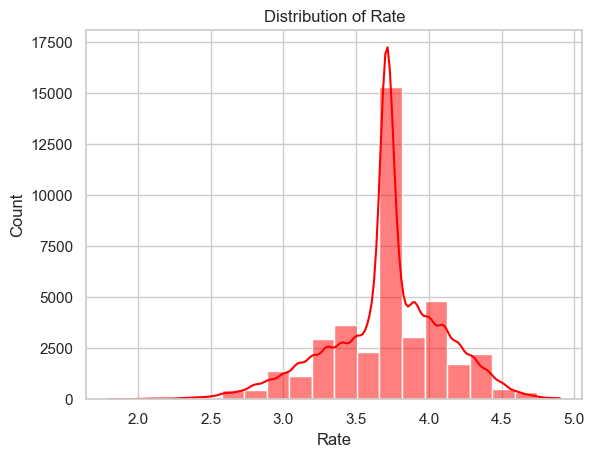

In [49]:
# Rate distribution
sns.histplot(df['rate'], kde=True, bins=20, color='red')
plt.title("Distribution of Rate")
plt.xlabel("Rate")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

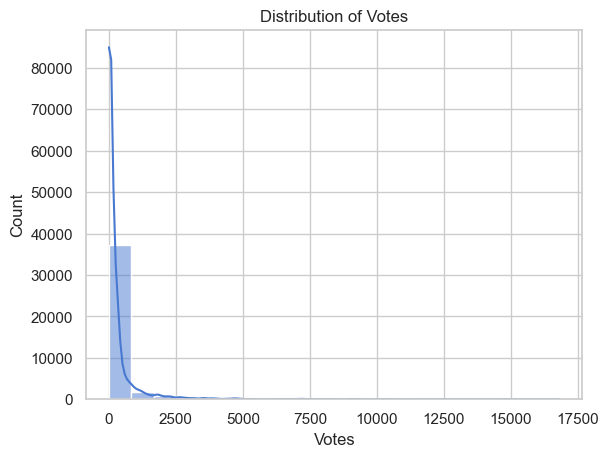

In [50]:
#  Votes distribution
sns.histplot(df['votes'], kde=True, bins=20)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

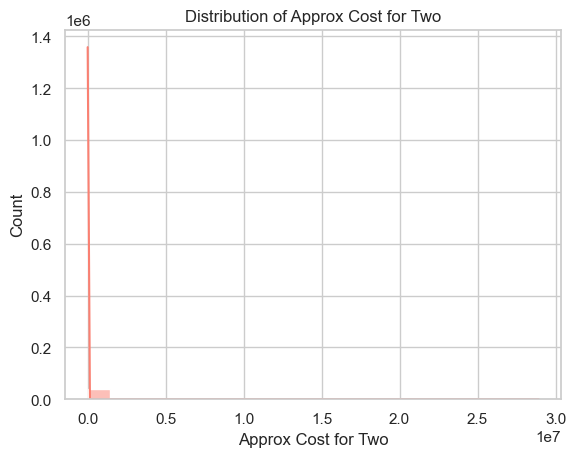

In [51]:
# Approx cost for two distribution
sns.histplot(df['approx_cost_for_two'], kde=True, bins=20, color='salmon')
plt.title("Distribution of Approx Cost for Two")
plt.xlabel("Approx Cost for Two")
plt.ylabel("Count")

Text(0, 0.5, 'Location')

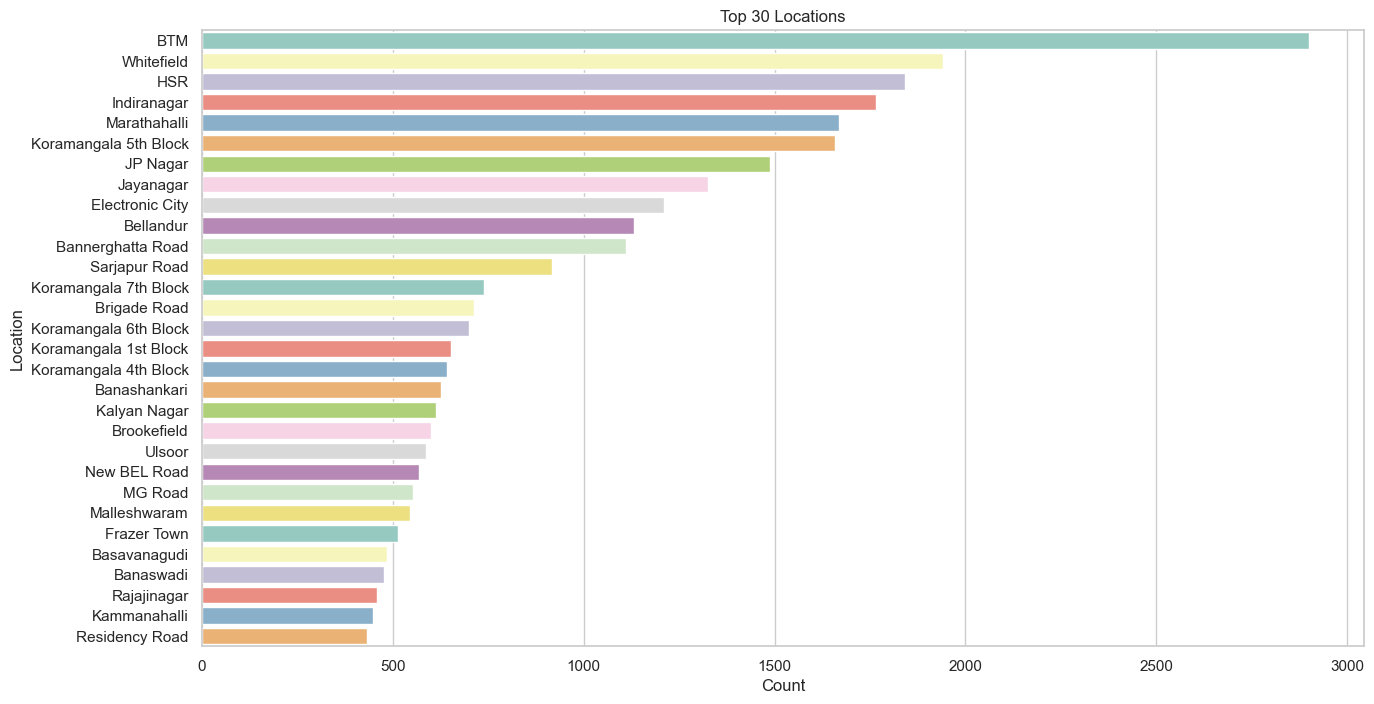

In [52]:
# Location count
plt.subplots( figsize=(15, 8))
sns.countplot(y='location', data=df, order=df['location'].value_counts().index[:30], palette="Set3")
plt.title("Top 30 Locations")
plt.xlabel("Count")
plt.ylabel("Location")

Text(0, 0.5, 'Restaurant Type')

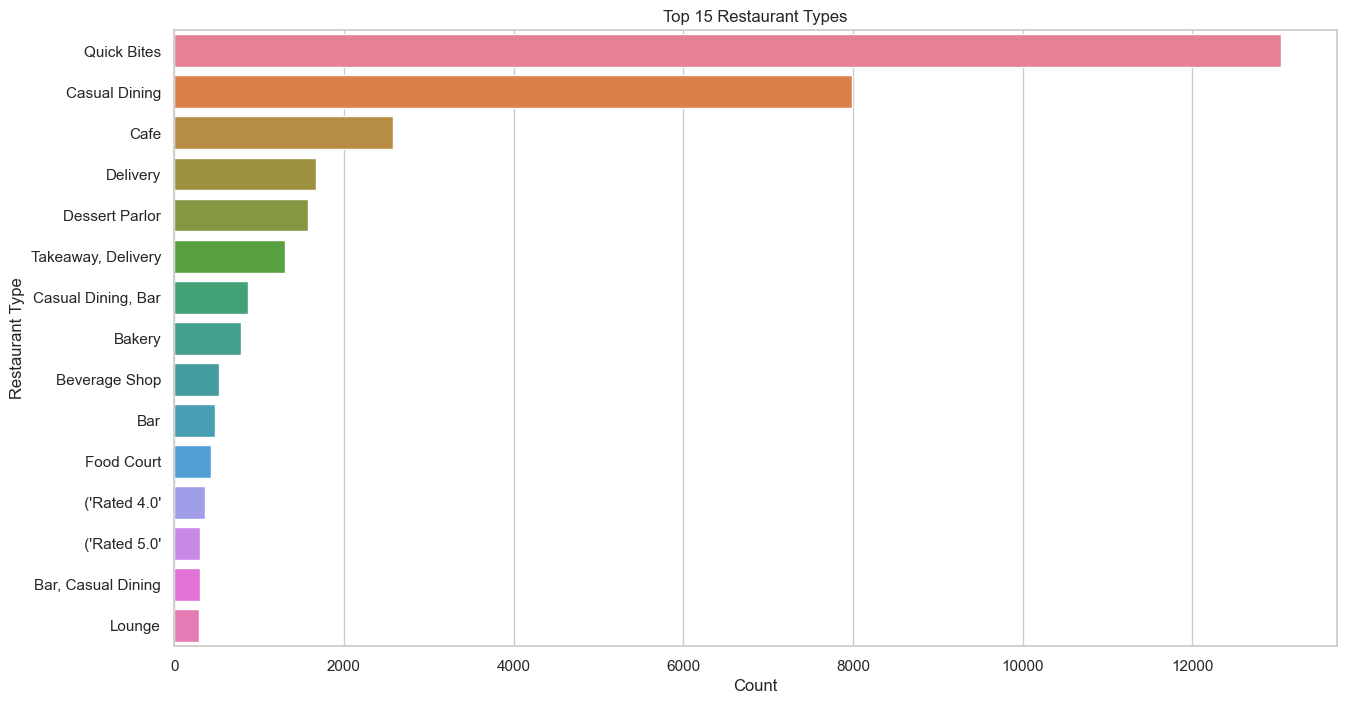

In [53]:
# Restaurant type count
plt.subplots(figsize=(15,8))
sns.countplot(y='rest_type', data=df, order=df['rest_type'].value_counts().index[:15], palette="husl")
plt.title("Top 15 Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")

Text(0, 0.5, 'Listed In Type')

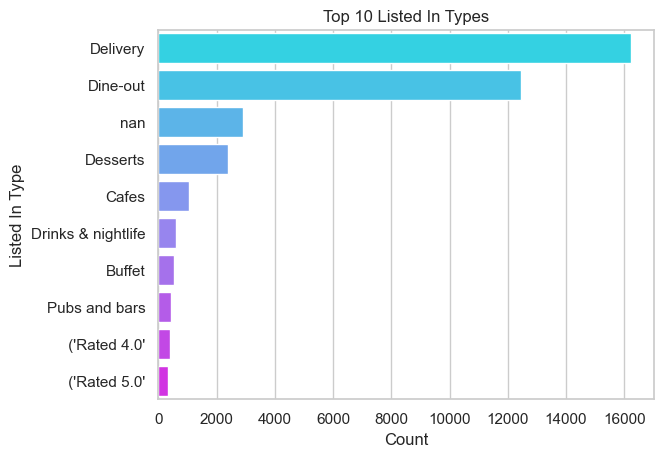

In [54]:
# Listed in type count
sns.countplot(y='listed_intype', data=df, order=df['listed_intype'].value_counts().index[:10], palette="cool")
plt.title("Top 10 Listed In Types")
plt.xlabel("Count")
plt.ylabel("Listed In Type")

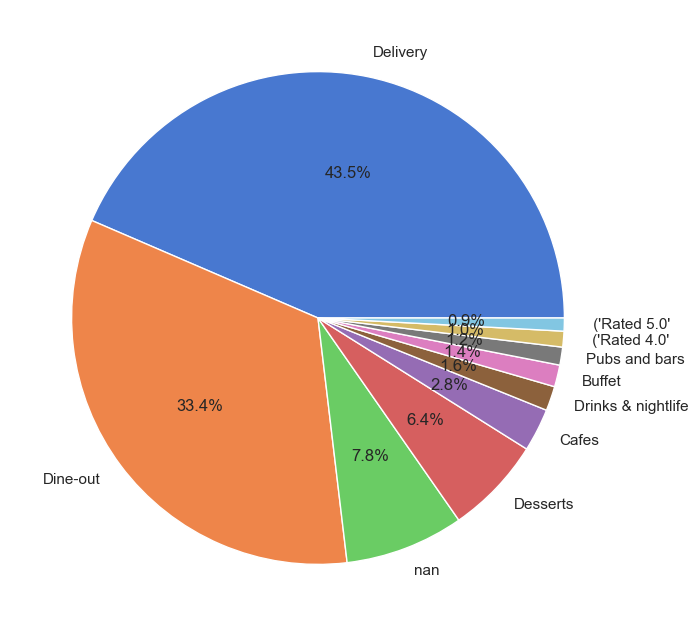

In [55]:
plt.subplots(figsize=(8, 8))
type_counts = df['listed_intype'].value_counts().head(10)
plt.pie(type_counts,autopct='%1.1f%%',labels=type_counts.index,)
plt.show()

Text(0.5, 1.0, 'Votes vs Rate')

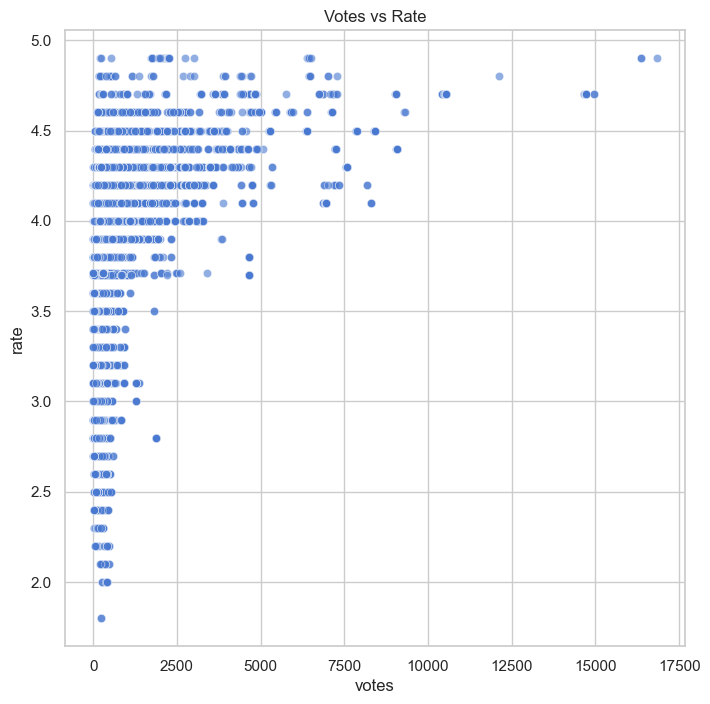

In [56]:
#  1 . Votes vs Rate (scatter)
plt.subplots(figsize=(8,8))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.6)
plt.title("Votes vs Rate")

Text(0.5, 1.0, 'Approx Cost vs Rate')

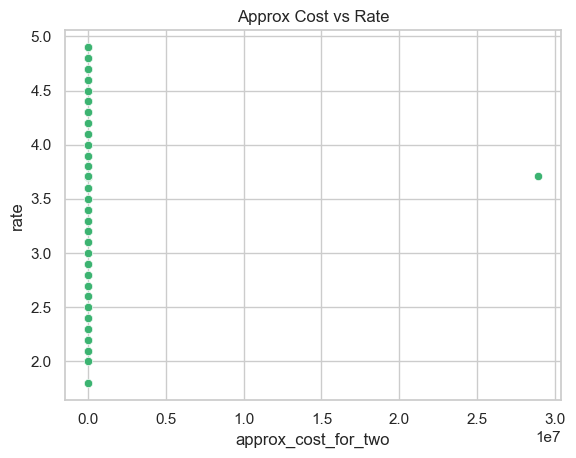

In [57]:
# 2. Approx cost for two vs Rate (scatter)
sns.scatterplot(x='approx_cost_for_two', y='rate', data=df, color='mediumseagreen')
plt.title("Approx Cost vs Rate")

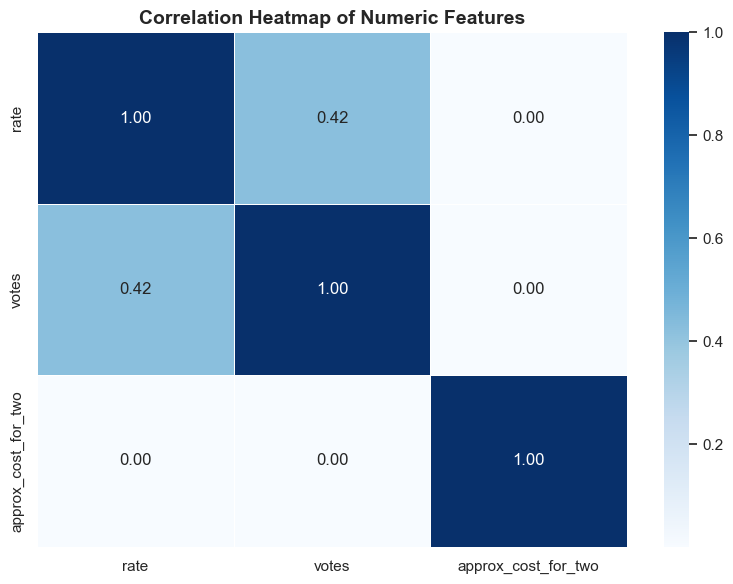

In [58]:
numeric_cols = ['rate', 'votes', 'approx_cost_for_two']

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Create the figure and axes
fig, axes = plt.subplots(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, ax=axes)

# Set title and adjust layout
axes.set_title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Numeric vs Categorical

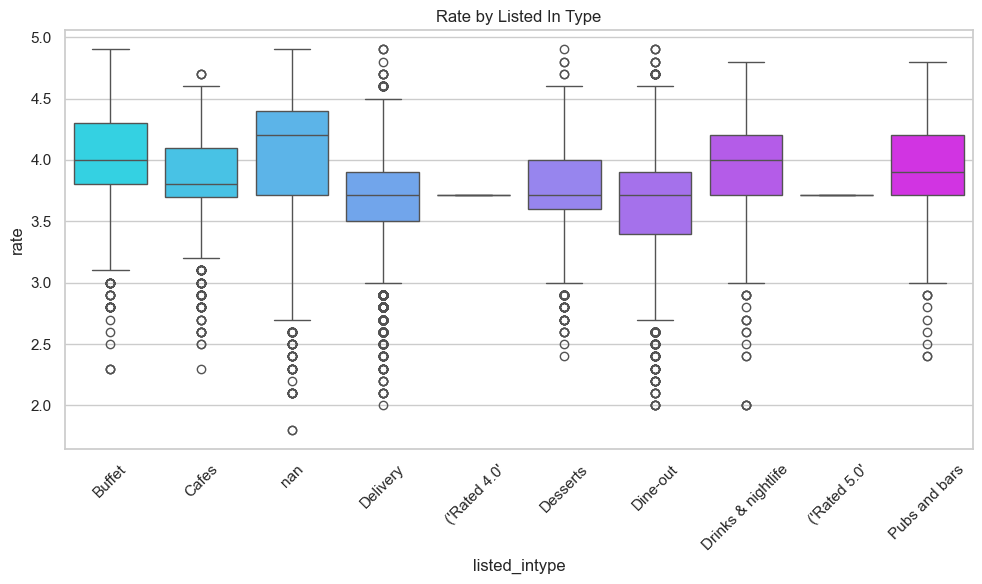

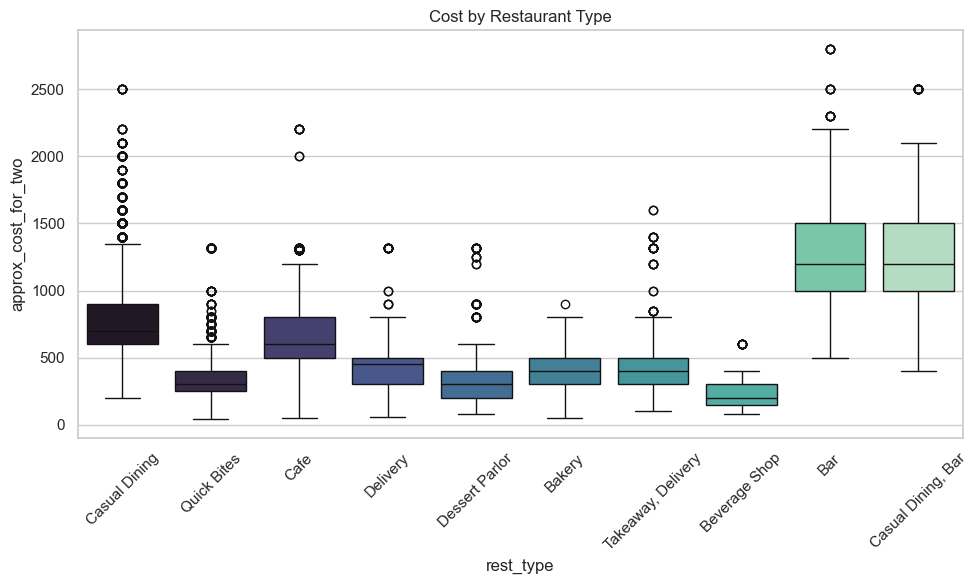

In [60]:
plt.figure(figsize=(10,6))
top_types = df['listed_intype'].value_counts().index[:10]
sns.boxplot(x='listed_intype', y='rate', data=df[df['listed_intype'].isin(top_types)], palette="cool")
plt.title("Rate by Listed In Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
top_rest = df['rest_type'].value_counts().index[:10]
sns.boxplot(x='rest_type', y='approx_cost_for_two', data=df[df['rest_type'].isin(top_rest)], palette="mako")
plt.title("Cost by Restaurant Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modeling

In [70]:
df.head(2)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two,listed_intype
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet


In [71]:
features = ['rate', 'votes', 'approx_cost_for_two']

In [74]:
X = df[features].dropna()  # drop the missing values

In [75]:
scaler = StandardScaler()

In [76]:
X_scaled = scaler.fit_transform(X)

In [78]:
inertia = []
K = range(1, 11)

In [79]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

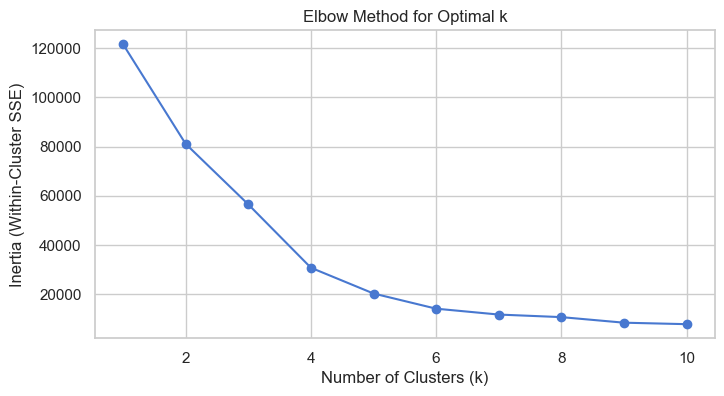

In [80]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [81]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

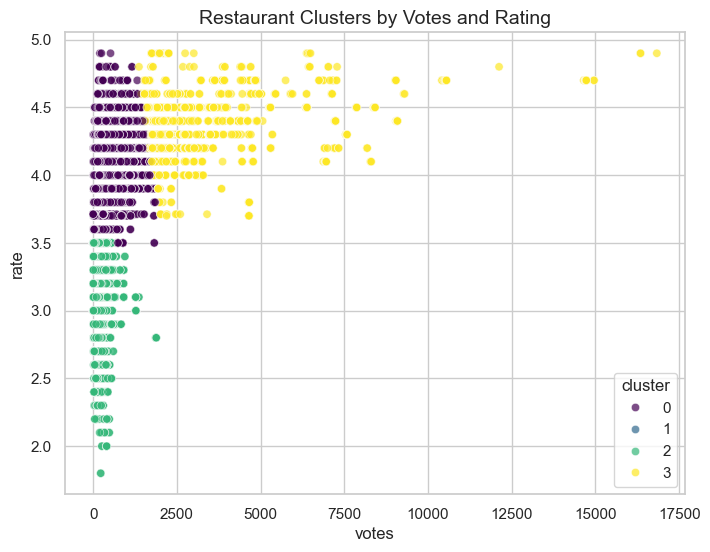

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='votes', y='rate',
    data=df,
    hue='cluster', palette='viridis',
    alpha=0.7
)
plt.title("Restaurant Clusters by Votes and Rating", fontsize=14)
plt.show()

## Conclusion

###  **Conclusion: K‑Means Clustering of Restaurants**

After performing K‑Means clustering on the restaurant dataset using **Rate**, **Votes**, and **Approximate Cost for Two**, four distinct groups of restaurants emerged.  

#### **Cluster Insights**
| Cluster | Characteristics | Interpretation |
|:--------:|:----------------|:----------------|
| **0** | Moderate to high ratings (≈4.0–4.4) with low vote counts | **Decent quality local restaurants** — fairly rated but not widely reviewed or known. |
| **1** | Sparse, smaller subgroup (depending on data spread) | May represent **transitional or mixed behavior** — restaurants with varying cost-value balance. |
| **2** | Lower ratings (≈2.0–3.2) and low votes | **Underperforming eateries** — less popular or new, possibly requiring improvement or visibility. |
| **3** | High ratings (≈4.2–5.0) with very high vote counts | **Popular and trusted restaurants** — highly rated favorites with broad customer engagement. |

#### **Key Observations**
- There is a **positive association** between votes and ratings — restaurants attracting many reviews tend to maintain higher ratings.  
- Most restaurants operate within the **low-to-moderate vote range**, while only a few achieve exceptional popularity.  
- The clusters effectively highlight **performance tiers** — from lesser-known low-rated places to high-rated, high-engagement establishments.  

#### **Business Implications**
- **Cluster 3 (High-performing):** Opportunities for partnership, promotion, or benchmarking.  
- **Cluster 0 & 1 (Average performers):** Focus marketing to increase visibility and encourage reviews.  
- **Cluster 2 (Low-rated):** Candidates for quality improvement or rebranding to attract customers.  
